In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
os.chdir('../')

In [3]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import scipy
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import tcav
from src.plots import plot_tsne, plot_pca
from src.concept_vectors import *
from src.util import *
import seaborn as sns

2022-11-29 21:01:18.125667: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Testing CEM Concept Vectors

In [4]:
concepts = ["X>0.5","Y>0.5"]
concept_vectors = []
concept_metadata = []

In [7]:
for i in range(len(concepts)):
    cem_vectors = list(load_cem_vectors("xor",i))
    concept_vectors+=cem_vectors
    concept_metadata+=[{'concept': concepts[i]} for j in range(len(cem_vectors))]
concept_vectors = np.array(concept_vectors)

In [8]:
label_by_concept = [i['concept'] for i in concept_metadata]

Text(27.0, 0.5, 'Axis 2')

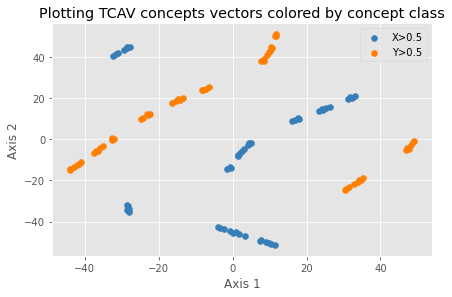

In [9]:
plt.title("Plotting TCAV concepts vectors colored by concept class")
plt.tight_layout()
plot_tsne(concept_vectors,label_by_concept)
plt.xlabel("Axis 1")
plt.ylabel("Axis 2")

Text(0.5, 1.0, 'Heatmap of average cosine distances between XOR classes, in Latent space')

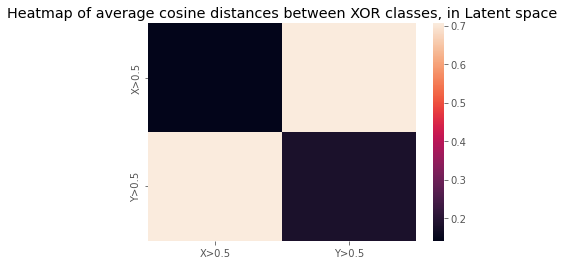

In [10]:
cosine_by_class_raw = find_average_distances(concept_vectors,encode_list(label_by_concept),cosine_metric=True)
sns.heatmap(cosine_by_class_raw,xticklabels=find_unique_in_order(label_by_concept),
            yticklabels=find_unique_in_order(label_by_concept))
plt.title("Heatmap of average cosine distances between XOR classes, in Latent space")